# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#Load libaries
import cv2
import csv
import math
import os
import numpy as np
import pickle
import random
import time

from PIL import Image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline 

In [2]:
# DONE: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#Print variables to check shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

#Check inputs again
print("# of training examples =", n_train)
print("# of validation examples =", n_valid)
print("# of testing examples =", n_test)
print("Image data shape =", image_shape)
print("# of classes =", n_classes)

# of training examples = 34799
# of validation examples = 4410
# of testing examples = 12630
Image data shape = (32, 32, 3)
# of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

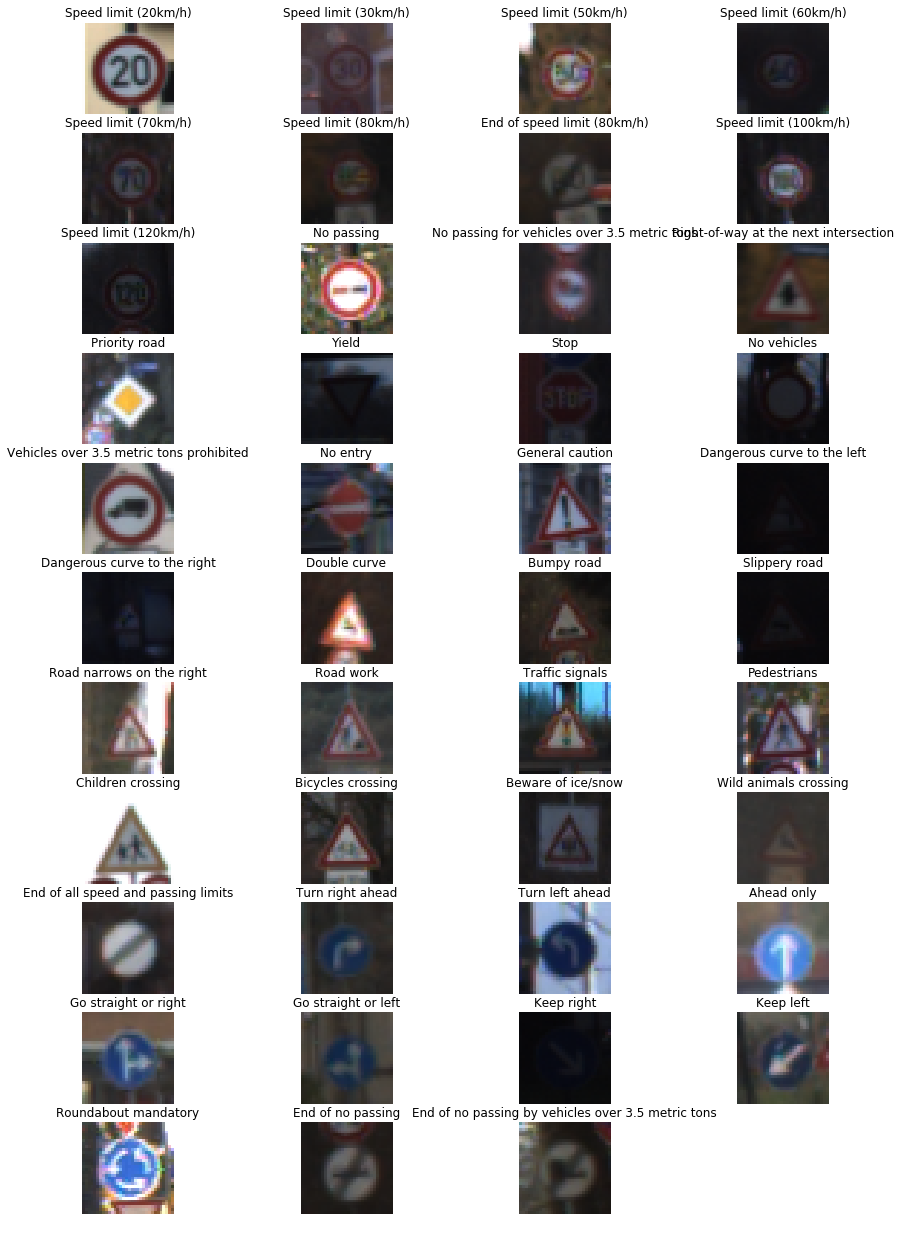

In [4]:
### Data exploration visualization code goes here.

#Read in labels from signnames csv
all_labels = []

with open('signnames.csv', 'r') as csvfile: #Select workbook and read in labels
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV)

    for row in readCSV:
        all_labels += [row[1]]

#Plot a single image from each class 
num_of_samples=[]
plt.figure(figsize=(15, 30))
for i in range(0, n_classes):
    plt.subplot(15, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #first image only
    plt.title(all_labels[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

Min # of images per class = 180
Max # of images per class = 2010


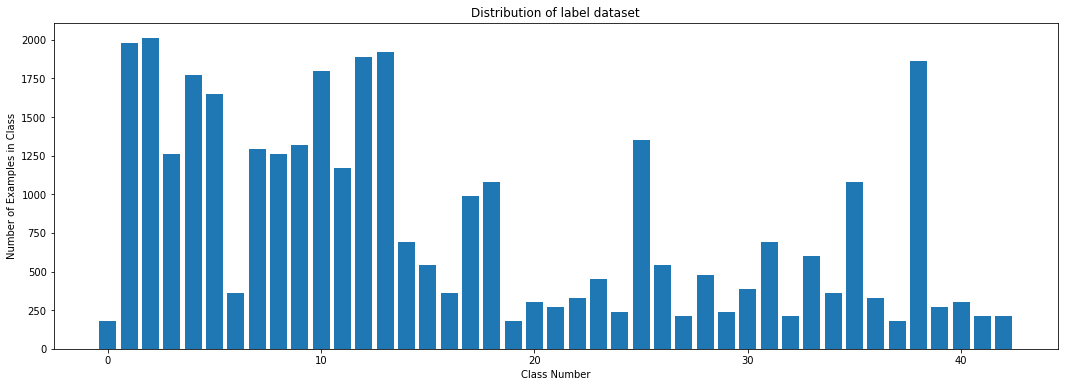

In [5]:
##plot distribution of images types (labels)

def plot_distribution_of_class(y_labels):
    values, counts = np.unique(y_labels, return_counts=True)
    plt.figure(figsize=(18, 6))
    plt.bar(values, counts)
    plt.ylabel('Number of Examples in Class')
    plt.xlabel('Class Number')
    plt.title("Distribution of label dataset")
    
plot_distribution_of_class(y_train)

print("Min # of images per class =", min(num_of_samples))
print("Max # of images per class =", max(num_of_samples))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

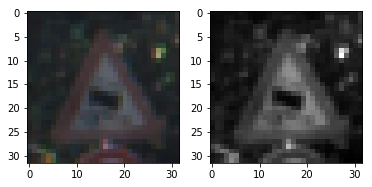

In [6]:
### Preprocess the data to normalize it. Other preprocessing steps could include converting to grayscale, etc.
### Convert images to greyscale as colors are not important in this dataset (content & shape is enough)

#Function: Resize raw input images (4D - number, height, weight, channel) into greyscale images 
def resize_raw_input_images(imgs):
    
    #Function: return reshaped image
    def gray(src_img):
        if src_img.dtype == np.uint8:
            src_img = np.array(src_img/255.0, dtype=np.float32)
        dst_img = cv2.cvtColor(src_img, cv2.COLOR_RGB2GRAY)
        return dst_img.reshape(32,32,1)
    
    #Run function
    norms = [gray(img) for img in imgs]
    return np.array(norms)
    
#Define labels and features in training, validation and test seet
labels_train   = y_train
features_train = resize_raw_input_images(X_train)

labels_valid   = y_valid
features_valid = resize_raw_input_images(X_valid)

labels_test    = y_test
features_test  = resize_raw_input_images(X_test)


##Show test images (before and after)
_, vframes = plt.subplots(nrows=1, ncols=2)
vframes[0].imshow(X_train[2000])
vframes[1].imshow(features_train[2000].squeeze(), cmap='gray')

### Model Architecture

In [7]:
"""
Overall Model Architecture:
> Adapted LeNet: 2 x convolutional layers, followed by 1 x flatten layer and 3 x fully connected linear layers

Detailed Architecture:
>convolution 1: 32x32x1  -> 28x28x12 -> relu -> 14x14x12 (pooling)
>convolution 2: 14x14x12 -> 10x10x25 -> relu -> 5x5x25   (pooling)
>flatten: 5x5x25-> 625
>drop out: 625  -> 625
>linear: 625    -> 300
>linear: 300   -> 150
>linear: 150   -> 43
"""

###Helper Functions

import tensorflow as tf

mu, sigma = 0, 0.1

#Function to define a convolutional layer
def conv_layer(input, in_len, in_depth, out_len, out_depth):
    filter_len = in_len - out_len + 1
    # Use pooling, rather than stride to reduce dimensions
    strides = [1,1,1,1] 
    W = tf.Variable(tf.truncated_normal(shape=(filter_len, filter_len, in_depth, out_depth),mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(out_depth))
    model = tf.nn.conv2d(input, W, strides=strides, padding='VALID') + b #valid padding
    return model

#Function to define a connected linear layer
def linear_layer(input, in_size, out_size):
    W = tf.Variable(tf.truncated_normal(shape=(in_size, out_size), mean=mu, stddev = sigma))
    b = tf.Variable(tf.zeros(out_size))
    model = tf.matmul(input, W) + b
    return model

In [8]:
###End-to-end CNN model architecture definition    
def classifier_CNN_model(input, keep_prob):
    ## Layer1: convolution layer: 32x32x1 -> 28x28x12 + Pooling
    conv1 = conv_layer(input, 32, 1, 28, 12)
    conv1 = tf.nn.relu(conv1)
    # pooling: 28x28x12 -> 14x14x12
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    ## Layer2: Convolution layer 14x14x12 -> 10x10x25 + Pooling
    conv2 = conv_layer(conv1, 14, 12, 10, 25)
    conv2 = tf.nn.relu(conv2)
    # pooling: 10x10x25 -> 5x5x25
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    ## Layer3: Dropout + 1st linear layer
    flat = tf.contrib.layers.flatten(conv2)
    dropped = tf.nn.dropout(flat, keep_prob)
    layer3 = linear_layer(dropped, 625, 300)
    layer3 = tf.nn.relu(layer3)
    
    ## Layer4: 2nd linear layer
    layer4 = linear_layer(layer3, 300, 100)
    layer4 = tf.nn.relu(layer4)
    
    ## Layer5: 3rd linear layer
    layer5 = linear_layer(layer4, 100, n_classes)
    return layer5

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, the accuracy on the test set should be calculated and reported as well.

### Define model and  input
from sklearn.utils import shuffle

#Define placeholders for x & y variables
model_feature_shape = features_train.shape[1:]
x = tf.placeholder(tf.float32, shape=(None,)+model_feature_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes) #one hot encoding

# Dropout layer parameter (prob = 1.0 when evaluating/testing the model; prob < 1.0 when training)
keep_prob = tf.placeholder(tf.float32)

#run the model
logits = classifier_CNN_model(x, keep_prob)

In [10]:
# A function for evaluating the accuracy of a model
prediction_step = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuary_step = tf.reduce_mean(tf.cast(prediction_step, tf.float32))
def evaluate_model(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuary_step, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
#Saving model
saver = tf.train.Saver()
model_file = './model' #define filename

In [12]:
### Training the model 
##Using Adam Optimizer
from sklearn.model_selection import train_test_split

#Set training parameters
epoch = 10
batch_size = 64
rate = 0.001

#Build training pipeline
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)
train_step  = tf.train.AdamOptimizer(learning_rate=rate).minimize(loss)

# Fuction to train model in TF
def train_model(X_data, y_data):
    #Run Tensorflow
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("------Begin training-----")
        for i in range(epoch):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=int(time.time()))
            start_time = time.time()
            for offset in range(0, len(X_train), batch_size):
                end = offset + batch_size
                features, labels = X_train[offset:end], y_train[offset:end]
                sess.run(train_step, feed_dict={x : features, y : labels, keep_prob: 0.8})
            validation = evaluate_model(X_test, y_test)
            print("[{3:.1f}s] epoch {0}/{1}: validation = {2:.3f}".format(i+1, epoch, validation, time.time()-start_time))

        saver.save(sess, model_file);
        print("model saved into {}".format(model_file))
        print("------Finish training-----")
        
# Run the training functoin on training data
train_model(features_train, labels_train)

------Begin training-----
[3.6s] epoch 1/10: validation = 0.862
[3.0s] epoch 2/10: validation = 0.946
[2.9s] epoch 3/10: validation = 0.950
[2.9s] epoch 4/10: validation = 0.980
[2.9s] epoch 5/10: validation = 0.983
[2.9s] epoch 6/10: validation = 0.991
[2.9s] epoch 7/10: validation = 0.987
[2.9s] epoch 8/10: validation = 0.995
[2.9s] epoch 9/10: validation = 0.997
[2.9s] epoch 10/10: validation = 0.998
model saved into ./model
------Finish training-----


In [13]:
# evaluate model with the validate set
with tf.Session() as sess:
    saver.restore(sess, model_file)
    accuracy = evaluate_model(features_valid, labels_valid)
    print("Model accuracy using validation set: {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./model
Model accuracy using validation set: 0.939


In [14]:
#Evaluate model with test set (only done at the end)
with tf.Session() as sess:
    saver.restore(sess, model_file)
    accuracy = evaluate_model(features_test, labels_test)
    print("Model accuracy using test set: {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./model
Model accuracy using test set: 0.930


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [30]:
### Load the images and plot them here.

#Function to reead images, convert color and resize
def read_images_to_standard_size(file):
    x = Image.open(file).convert("RGB")
    x = x.resize((32,32))
    return np.array(x)

#Identify file location
folder = "traffic-signs-real-examples"
files = [f for f in os.listdir(folder) if f.endswith("png") or f.endswith("jpg")]
paths = [os.path.join(folder, f) for f in files]
my_labels = [int(f.split('.')[0]) for f in files]

real_example_images = np.array([read_images_to_standard_size(f) for f in paths])

### Predict the Sign Type for Each Image

In [31]:
#Assign labels by mapping from class index into text
signname = {}
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for r in reader:
        if r[0].isdigit():
            signname[int(r[0])] = r[1]
num_class_example_images = len(signname)

In [32]:
### Run the predictions  and use the model to output the prediction for each image.

# preprocess images
my_features = resize_raw_input_images(real_example_images)

#Function to predict images
def predict(features, display_output=False):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        results = sess.run(tf.argmax(logits, 1), {x : features, keep_prob:1.0})
        if display_output:
            results = [signname[n] for n in results]
        return results
    
#Run function
predict(my_features, True)

INFO:tensorflow:Restoring parameters from ./model


['Stop',
 'General caution',
 'Yield',
 'Priority road',
 'Ahead only',
 'Speed limit (30km/h)',
 'Speed limit (60km/h)',
 'Speed limit (50km/h)']

### Analyze Performance

In [33]:
### Calculate  accuracy for my real world images. 

#Run model evaluation in TensorFlow
with tf.Session() as sess:
    saver.restore(sess, model_file)
    accuracy = evaluate_model(my_features, my_labels)
    print("Model accuracy is {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./model
Model accuracy is 0.875


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [34]:
### Display top five softmax probs for the predictions on real world traffic signs found on web

#Define full prediction function
def full_softmax_predictions(features):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        pred = tf.nn.softmax(logits)
        results = sess.run(tf.nn.top_k(pred, k=5), {x : features, keep_prob:1.0})
        return results
    
#Run prediction function
full_predictions = full_softmax_predictions(my_features)

#Function to show sign names and sample statistics for each prediction
def sample_statistics(features, labels):
    h = [0 for i in range(num_class_example_images)]
    samples = {}
    for idx, l in enumerate(labels):
        h[l] += 1
        if l not in samples:
            samples[l] = features[idx]
    return h, samples
#run function
h, training_samples = sample_statistics(X_train, y_train)
training_labels = signname

INFO:tensorflow:Restoring parameters from ./model


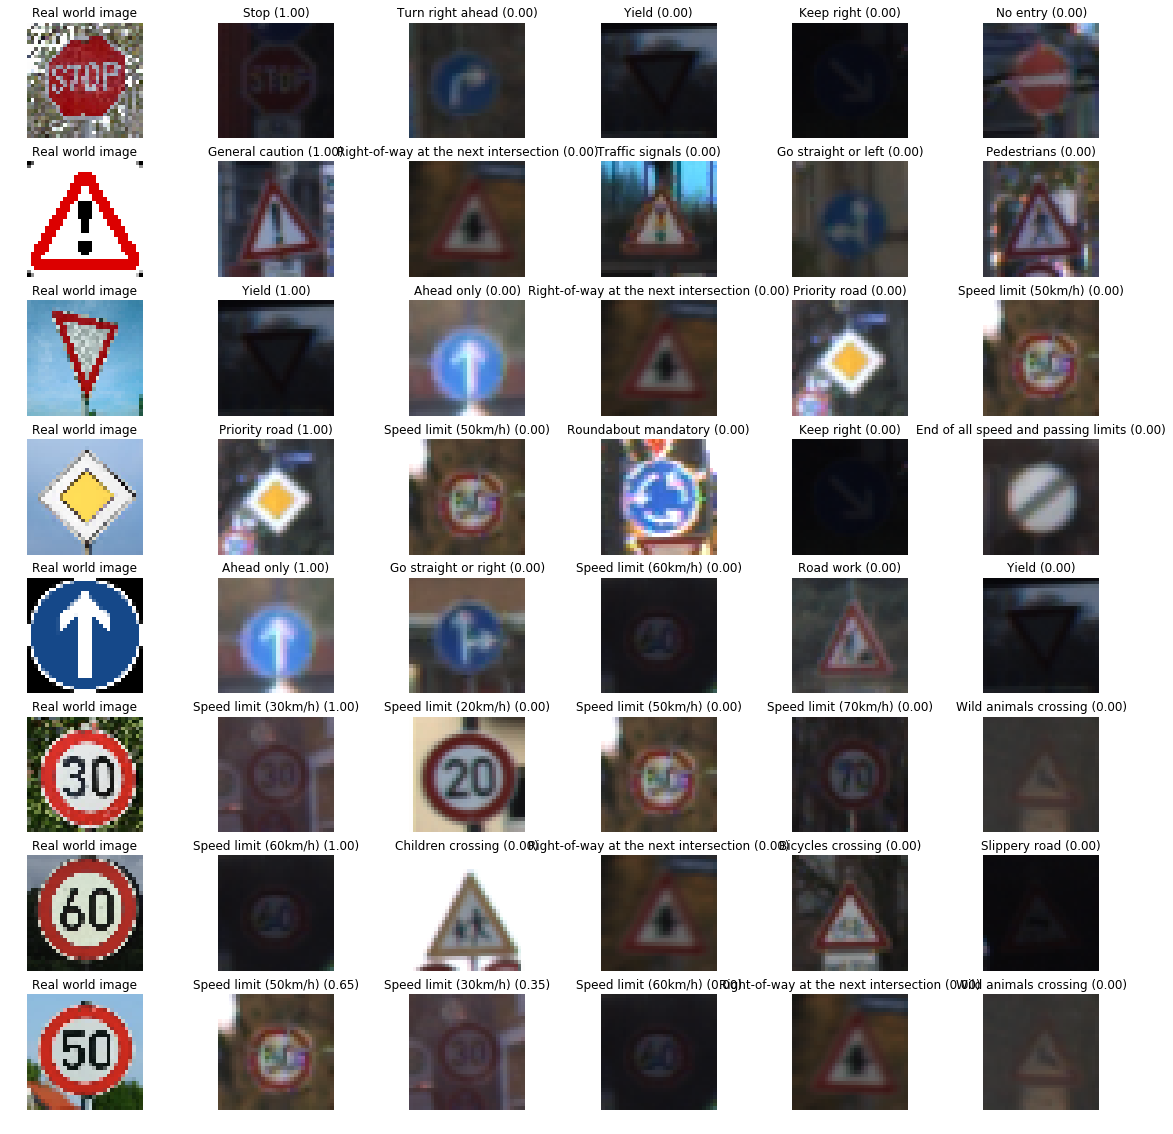

In [35]:
#reset default figuresize 
figsize_default = plt.rcParams['figure.figsize']

#Function to find top K values
def explore_top_k_predictions(features, top_k_preds):
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    ncols = len(top_k_preds.values[0])+1
    nrows = len(top_k_preds.values)
    h, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    #Display top 5 predictions for each image
    for r, img in enumerate(features):
        for c in range(ncols):
            axes[r][c].axis('off') #no axis
        cur = axes[r][0]
        cur.imshow(img) # show image
        cur.set_title("Real world image")
        for c,prob in enumerate(top_k_preds.values[r]):  # show the top five softmax prob
            cur = axes[r][c+1]
            class_idx = top_k_preds.indices[r][c]
            sample = training_samples[class_idx]
            sample_text = training_labels[class_idx]
            cur.imshow(sample)
            cur.set_title("{} ({:.2f})".format(sample_text, prob))
    plt.rcParams['figure.figsize'] = figsize_default
    
#Run function
explore_top_k_predictions(real_example_images, full_predictions)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [23]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")